In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import time

In [4]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data()

In [5]:
X_train = np.reshape(x_train,(50000,3072))/255
X_test = np.reshape(x_test,(10000,3072))/255

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train=scaler.transform(X_train)

In [33]:
scaler.fit(X_test)
X_test=scaler.transform(X_test)

In [60]:
theta=np.ones([3072,10])

In [ ]:
start = time.time()
theta=0.1*np.ones([3072,10])
for j in range(25):
    for i in range(len(X_train)):
        updatey=np.zeros([3072,10])
        Phi=X_train[i]
        q=np.exp(0.05*np.dot(theta.T,Phi))
        tol=sum(q)

        updatecom=(q/tol)*Phi.reshape(3072,1)
        updatey[:,y_train[i][0]]=Phi
        update=(-1*updatecom+updatey)
        theta=theta+0.003*update
    
end = time.time()
print(end-start)

In [ ]:
from sklearn import  metrics

In [ ]:
def Logistic_digit_pred(X_test,theta,i):
    qp=np.exp(np.dot(theta.T,X_test[i]))
    tol=sum(qp)

    return np.argmax(qp/tol)


In [ ]:
A=[]
for i in range(len(y_test)):
    A.append(Logistic_digit_pred(X_test,theta,i))


In [ ]:
cm1 = metrics.confusion_matrix(y_test, A)
print("Confusion matrix:\n%s" % cm1)

In [ ]:
print("Accuracy={}".format(metrics.accuracy_score(y_test,A)))

In [5]:
import matplotlib.pyplot as plt

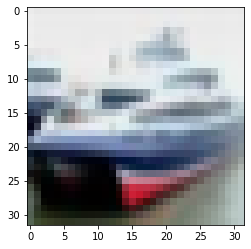

In [6]:
plt.imshow(x_test[1][::])

array([3], dtype=uint8)

In [8]:
x0=x_train[10].reshape(32*32*3,1)

In [9]:
x0.shape

(3072, 1)

In [10]:
y_train.shape

(50000, 1)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
X0_train = np.reshape(x_train,(50000,3072))/255

In [16]:
from sklearn.decomposition import PCA
import numpy as np
pca=PCA(400)
pca.fit(X0_train)
pca.components_  #返回模型的各個特徵向量

array([[ 0.02634975,  0.02778743,  0.03111119, ...,  0.01573704,
         0.01672143,  0.01920378],
       [-0.01584631, -0.01756834, -0.02031506, ...,  0.02254787,
         0.02146667,  0.02053795],
       [-0.02171791, -0.01858465, -0.01290838, ..., -0.02581563,
        -0.02255578, -0.01697871],
       ...,
       [ 0.0095942 , -0.00063307,  0.01320691, ..., -0.00642011,
        -0.00501533,  0.00317692],
       [ 0.01611385,  0.03038543,  0.0294829 , ...,  0.00975578,
        -0.01478228, -0.01887904],
       [ 0.01611806,  0.01826534,  0.02384624, ..., -0.02301063,
        -0.00811308, -0.02741926]])

In [17]:
sum(pca.explained_variance_ratio_)  #返回各個成為各自的方差百分比（貢獻率）

0.9763634836869182

In [18]:
X_train=pca.transform(X0_train)

In [19]:
X0_test = np.reshape(x_test,(10000,3072))/255

In [20]:
pcat=PCA(400)
pcat.fit(X0_test)
X_test=pcat.transform(X0_test) 

In [21]:
X_train.shape

(50000, 400)

In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
index=np.where(y_train==0)

In [16]:
len(index[0])

5000

In [17]:
index[0][0:10]

array([ 29,  30,  35,  49,  77,  93, 115, 116, 129, 165], dtype=int64)

In [18]:
np.random.randint(low=1,high=len(index[0]),size=10)


array([ 905, 1403, 3609, 2946, 1743, 4500, 1892, 2147, 2312, 4016])

In [19]:
sum(x_train[index]).shape

(32, 3)

In [16]:
0.5*(x_train[index[0]][0]+x_train[index[0]][1])

NameError: name 'index' is not defined

In [69]:
X_bar=sum(x_train[index[0]])/(x_train[index[0]].shape[0])

<Figure size 432x288 with 0 Axes>

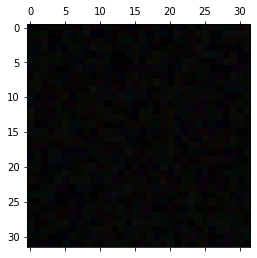

In [71]:
plt.gray()
plt.matshow(X_bar.reshape(32,32,3))

In [23]:
plt.imshow((x_train[index[0]][30]))

NameError: name 'index' is not defined

In [71]:
def theta_fit(X_train,y_train,k,sigma,lamb):
    index=np.where(y_train==k)
    index=index[0][0:50]
    P=[]
    for i in range(X_train.shape[0]):
        for j in range(X_train[index].shape[0]):
            P.append(np.exp(-sigma*(np.linalg.norm(X_train[i]-X_train[index][j]))**2))

    Phi=np.array(P).reshape(X_train.shape[0],X_train[index].shape[0])
    Pi=np.zeros(X_train.shape[0]).reshape(X_train.shape[0],1)
    Pi[index]=1
    Phinv=np.linalg.inv(np.dot(Phi.T,Phi)+(lamb*np.eye(X_train[index].shape[0])))
    pi=np.dot(Phi.T,Pi)
    theta=np.dot(Phinv,pi)
    return theta

In [72]:
theta0=theta_fit(X_train,y_train,0,0.01,0.1)

In [73]:
theta0

array([[ 0.32232791],
       [-0.03753319],
       [-0.02097549],
       [ 0.20288052],
       [-0.02204135],
       [ 0.04365338],
       [ 0.19487609],
       [ 0.02542809],
       [-0.12749808],
       [-0.05019179],
       [ 0.00231906],
       [ 0.07459936],
       [ 0.0251293 ],
       [-0.0741114 ],
       [ 0.1697801 ],
       [-0.04903351],
       [ 0.06286861],
       [ 0.00072216],
       [ 0.02634114],
       [ 0.03495254],
       [ 0.05605312],
       [-0.18431595],
       [ 0.124248  ],
       [ 0.06633298],
       [-0.11470207],
       [ 0.02011332],
       [-0.10025754],
       [ 0.07439298],
       [ 0.00830485],
       [-0.03571852],
       [ 0.05145342],
       [-0.00527045],
       [-0.02430375],
       [-0.03812674],
       [ 0.01195009],
       [ 0.29357429],
       [-0.03449332],
       [ 0.00266404],
       [-0.04041476],
       [ 0.06976795],
       [ 0.13523238],
       [ 0.16512511],
       [ 0.06794935],
       [-0.02525566],
       [ 0.02642029],
       [ 0

In [74]:
index0=np.where(y_train==0)
index0=index0[0][0:10]
index0    

array([ 29,  30,  35,  49,  77,  93, 115, 116, 129, 165], dtype=int64)

In [75]:
#X_test[0]

In [76]:
P0=[]
for j in range(X_train[index0].shape[0]):
    P0.append(np.exp(-0.01*(np.linalg.norm(X_test[0]-X_train[index0][j]))**2))
    

In [78]:
#Pht0=np.array(P0).reshape(X_train[index0].shape[0],1)
#p0=max(0,np.dot(theta0.T,Pht0))
#p0 


In [79]:
theta0=theta_fit(X_train,y_train,0,0.01,0.1)
theta1=theta_fit(X_train,y_train,1,0.01,0.1)
theta2=theta_fit(X_train,y_train,2,0.01,0.1)
theta3=theta_fit(X_train,y_train,3,0.01,0.1)
theta4=theta_fit(X_train,y_train,4,0.01,0.1)
theta5=theta_fit(X_train,y_train,5,0.01,0.1)
theta6=theta_fit(X_train,y_train,6,0.01,0.1)
theta7=theta_fit(X_train,y_train,7,0.01,0.1)
theta8=theta_fit(X_train,y_train,8,0.01,0.1)
theta9=theta_fit(X_train,y_train,9,0.01,0.1)

In [ ]:
#theta9=theta_fit(X_train,y_train,9,0.01,1)

In [ ]:
theta9

In [80]:
def LS_pred_digit(X_train,X_test,y_train,theta0,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,i0):
    index0=np.where(y_train==0)
    index0=index0[0][0:50]
    index1=np.where(y_train==1)
    index1=index1[0][0:50]
    index2=np.where(y_train==2)
    index2=index2[0][0:50]
    index3=np.where(y_train==3)
    index3=index3[0][0:50]
    index4=np.where(y_train==4)
    index4=index4[0][0:50]
    index5=np.where(y_train==5)
    index5=index5[0][0:50]
    index6=np.where(y_train==6)
    index6=index6[0][0:50]
    index7=np.where(y_train==7)
    index7=index7[0][0:50]
    index8=np.where(y_train==8)
    index8=index8[0][0:50]
    index9=np.where(y_train==9)
    index9=index9[0][0:50]
    
    P0=[]
    P1=[]
    P2=[]
    P3=[]
    P4=[]
    P5=[]
    P6=[]
    P7=[]
    P8=[]
    P9=[]

    for j in range(X_train[index0].shape[0]):
        P0.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index0][j]))**2))
    for j in range(X_train[index1].shape[0]):
        P1.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index1][j]))**2))
    for j in range(X_train[index2].shape[0]):
        P2.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index2][j]))**2))
    for j in range(X_train[index3].shape[0]):
        P3.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index3][j]))**2))
    for j in range(X_train[index4].shape[0]):
        P4.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index4][j]))**2))
    for j in range(X_train[index5].shape[0]):
        P5.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index5][j]))**2))
    for j in range(X_train[index6].shape[0]):
        P6.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index6][j]))**2))
    for j in range(X_train[index7].shape[0]):
        P7.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index7][j]))**2))
    for j in range(X_train[index8].shape[0]):
        P8.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index8][j]))**2))
    for j in range(X_train[index9].shape[0]):
        P9.append(np.exp(-0.01*(np.linalg.norm(X_test[i0]-X_train[index9][j]))**2))

    Pht0=np.array(P0).reshape(X_train[index0].shape[0],1)
    p0=max(0,np.dot(theta0.T,Pht0))
    Pht1=np.array(P1).reshape(X_train[index1].shape[0],1)
    p1=max(0,np.dot(theta1.T,Pht1))
    Pht2=np.array(P2).reshape(X_train[index2].shape[0],1)
    p2=max(0,np.dot(theta2.T,Pht2))
    Pht3=np.array(P3).reshape(X_train[index3].shape[0],1)
    p3=max(0,np.dot(theta3.T,Pht3))
    Pht4=np.array(P4).reshape(X_train[index4].shape[0],1)
    p4=max(0,np.dot(theta4.T,Pht4))
    Pht5=np.array(P5).reshape(X_train[index5].shape[0],1)
    p5=max(0,np.dot(theta5.T,Pht5))
    Pht6=np.array(P6).reshape(X_train[index6].shape[0],1)
    p6=max(0,np.dot(theta6.T,Pht6))
    Pht7=np.array(P7).reshape(X_train[index7].shape[0],1)
    p7=max(0,np.dot(theta7.T,Pht7))
    Pht8=np.array(P8).reshape(X_train[index8].shape[0],1)
    p8=max(0,np.dot(theta8.T,Pht8))
    Pht9=np.array(P9).reshape(X_train[index9].shape[0],1)
    p9=max(0,np.dot(theta9.T,Pht9))
    
    tol=p1+p2+p3+p4+p5+p6+p7+p8+p9
    return np.argmax([p0/tol,p1/tol,p2/tol,p3/tol,p4/tol,p5/tol,p6/tol,p7/tol,p8/tol,p9/tol])
    

In [81]:
theta5

array([[-0.05866665],
       [ 0.01820253],
       [ 0.03666925],
       [ 0.08381354],
       [-0.04790733],
       [ 0.04339069],
       [ 0.03823958],
       [-0.09910342],
       [ 0.27263406],
       [ 0.11801848],
       [-0.02774231],
       [-0.10583054],
       [-0.03033709],
       [-0.02850744],
       [ 0.01753417],
       [ 0.06408652],
       [ 0.15526471],
       [-0.12110284],
       [ 0.02586029],
       [-0.02593912],
       [-0.19154295],
       [ 0.15423002],
       [-0.04607481],
       [ 0.06907424],
       [-0.01885289],
       [ 0.02236232],
       [ 0.035753  ],
       [ 0.19457978],
       [-0.05886716],
       [ 0.0400711 ],
       [-0.00073997],
       [ 0.11136747],
       [ 0.10336239],
       [ 0.11673262],
       [-0.06874317],
       [-0.07740568],
       [-0.04024343],
       [ 0.03013934],
       [ 0.02590989],
       [-0.00071644],
       [ 0.10532495],
       [-0.0234787 ],
       [ 0.26508294],
       [ 0.46266225],
       [ 0.03130934],
       [-0

In [95]:
i0=np.random.randint(low=1,high=len(y_test),size=1)[0]

#plt.imshow(X_train[i0].reshape(32,32,3))
y_test[i0]

array([6], dtype=uint8)

In [96]:
LS_pred_digit(X_train,X_test,y_train,theta0,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,i0)

9

In [52]:
theta0

array([[ 0.1369125 ],
       [-0.01274348],
       [ 0.01246546],
       [ 0.09777534],
       [ 0.00518042],
       [-0.00805813],
       [-0.02444731],
       [ 0.04016913],
       [-0.01159687],
       [-0.0168548 ]])

In [102]:
score=0
ID=y_test[0:10000]
for i in range(len(ID)):
    if ((LS_pred_digit(X_train,X_test,y_train,theta0,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,i0)-ID[i])==0):
        score=score+1
score/len(ID)

0.1